In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
import imageio

%matplotlib inline 

In [5]:
imageFile = './images/20180628_215039.jpg' #Characters_01
# imageFile = './images/20180628_215005.jpg' #Characters_02
# imageFile = './images/20180628_215018.jpg' #Characters_03
# imageFile = './images/20180628_215027.jpg' #Characters_04
# imageFile = './images/20180628_215039.jpg' #Characters_05

# Read image
imRaw = cv2.imread(imageFile)
imCopy = imRaw.copy()

# Blur image
im = cv2.blur(imRaw,(3, 1))

# Convert to gray scale
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Binarize 
ret, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY_INV, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours
im2, ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

# Add bounding boxes
n = 0
nChar = np.shape(sorted_ctrs)[0]
for i in range(nChar):
    # Draw the bounding box
    x, y, w, h = cv2.boundingRect(sorted_ctrs[i])
    if (w * h) > 300 and (w * h) < 20000:
        im = cv2.rectangle(imRaw, (x,y),( x + w, y + h ),(0, 255, 0),2)

        roi = gray[y:y+h, x:x+w]
        
        imageio.imwrite('./characters_01_NEW/char_{}.jpg'.format(n), roi)
        n += 1

#cv2.imshow('image', imRaw)
#cv2.waitKey(0)
#cv2.imwrite('test.png',imRaw)
#cv2.destroyAllWindows()

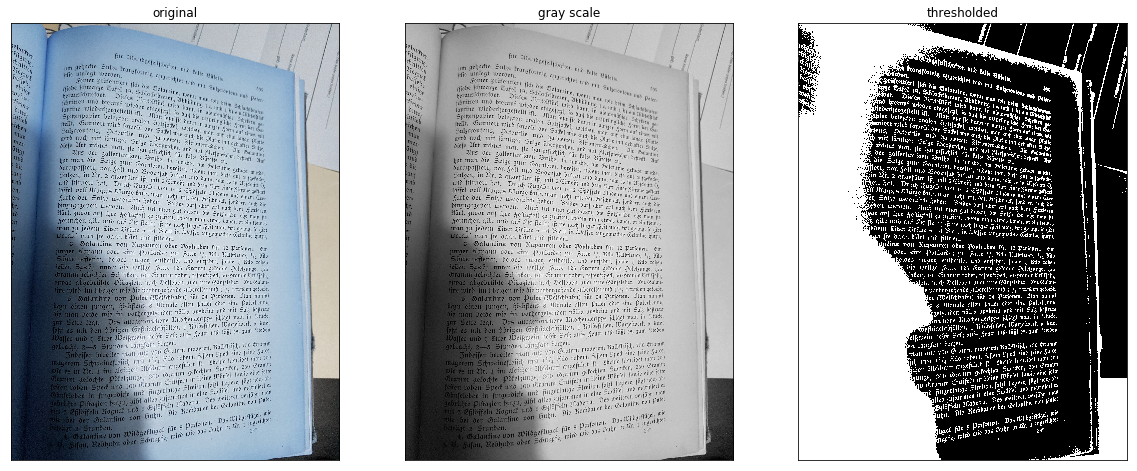

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(20, 15))

ax[0].imshow(imCopy)
ax[1].imshow(gray, cmap='gray')
ax[2].imshow(thresh, cmap='gray')

ax[0].set_title('original')
ax[1].set_title('gray scale')
ax[2].set_title('thresholded')

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
plt.show()

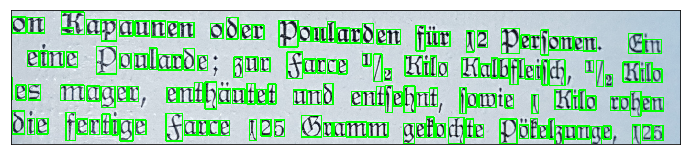

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 25))

ax.imshow(im)
ax.set_xlim([1000, 2400])
ax.set_ylim([2300, 2020])
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [9]:
import os
import imageio

dataPath = './sorted/a/'

files = os.listdir(dataPath)

'''
for file in files:
    im = cv2.imread(dataPath + file)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
'''

'\nfor file in files:\n    im = cv2.imread(dataPath + file)\n    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)\n'

In [15]:
dataPath = './characters_01_NEW/'
files = os.listdir(dataPath)
file = files[0]


#im = cv2.imread(dataPath + file)
im = imageio.imread(dataPath + file)
#im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

m = im.shape[0]
n = im.shape[1]

#constant= cv2.copyMakeBorder(im, 100, 100, 100, 100, cv2.BORDER_CONSTANT, value=[0, 0, 0])

#print(constant.shape)
print(im.shape)

(72, 70)


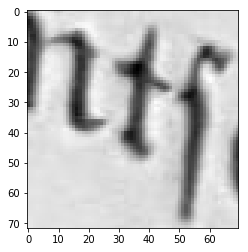

In [13]:
plt.imshow(im, cmap='gray')
plt.show()

In [9]:
import struct as st
import numpy as np

filename = {'images' : 'train-images-idx3-ubyte' ,'labels' : 'train-labels.idx1-ubyte'}
train_imagesfile = open(filename['images'],'rb')

In [21]:
train_imagesfile.seek(0)
magic = st.unpack('>4B',train_imagesfile.read(4)) # Magic number

nImg = st.unpack('>I',train_imagesfile.read(4))[0] #num of images 60000
nR = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows 28
nC = st.unpack('>I',train_imagesfile.read(4))[0] #num of column 28

images_array = np.zeros((nImg,nR,nC))

In [23]:
nBytesTotal = nImg*nR*nC*1 #since each pixel data is 1 byte
images_array = 255 - np.asarray(st.unpack('>'+'B'*nBytesTotal, train_imagesfile.read(nBytesTotal))).reshape((nImg,nR,nC))

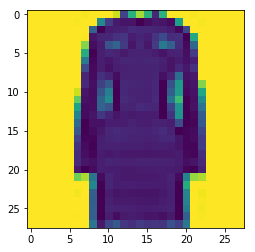

In [27]:
plt.imshow(images_array[500])

In [48]:
st.pack('>I', 0)

b'\x00\x00\x00\x00'

In [42]:
#train_imagesfile.seek(0)
train_imagesfile.read(4)

b'\x00\x00\x00\x00'

In [3]:
cap = cv2.VideoCapture(0)

In [4]:
while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

In [5]:
cap = cv2.VideoCapture(0)